# Alex Henczel

#How has the standard for movie length, genre distribution and age rating changed over the last 40 years. 
Is there any correlation between newer movies being more graphic IE having a large portion of movies each year being mature vs pg13 
How as movie length changed over the last 40 years
Has the distribution of movie genres changed over the last 40 years

I plan on sorting the data to eliminate the data that doesnt it the criteria, such as being incomplete ie data points that dont contain a rating and or year released .  i plan to add graphs and charts to represent the distribution such as movie genre variety or age rating percentage. 


For my first EDA I filtered 3/4 data sets. I ran into some issues with hulu; the feature length/age rating column combined for some reason and i couldnt figureout how to fix it (im going into office hours to get help). I combined any similiar lables, such as 18+ and R, removed the unrated rows and removed any data that didnt match with the rest. I made 3 pie charts sinces its a simple way to show a distribution with lots of data like this. My next goal will be to split this every further, some of our sets have upwards of 10,000 rows meaning i should be able to get a fairly significant number of data points for each year/decade. I will split the data further and compare the distributions.

I still need to explore the other questions, but based on what ive done so far my nex questions are:

## What is the genre distribution per year and or decade
## What service contains the most amount of features from before and after the century changed
## Which services are geared more towards kids, and which feature more adult content
## How does average movie length compare for each genre on average 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

NF = pd.read_csv("../data/raw/netflix_titles.csv")
DP = pd.read_csv("../data/raw/disney_plus_titles.csv")
AP = pd.read_csv("../data/raw/amazon_prime_titles.csv")
HU = pd.read_csv("../data/raw/hulu_titles.csv")



In [ ]:
#New df's with only year released and rating. ALso filtered data.

yearRating_NF= NF.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
yearRating_NF.dropna()

for i in range(yearRating_NF['rating'].count()):
 if yearRating_NF.rating[i] == 'NC-17':
       yearRating_NF.rating[i] = 'TV-MA'
 elif yearRating_NF.rating[i] == 'TV-Y7-FV':
       yearRating_NF.rating[i] = 'TV-Y7'

        
yearRating_NF=yearRating_NF[yearRating_NF.rating !='66 min']
yearRating_NF=yearRating_NF[yearRating_NF.rating !='74 min']
yearRating_NF=yearRating_NF[yearRating_NF.rating !='84 min']
yearRating_NF=yearRating_NF[yearRating_NF.rating !='UR']
yearRating_NF=yearRating_NF[yearRating_NF.rating !='NR']

NF2=yearRating_NF
yearRating_NF=yearRating_NF.groupby(['rating']).count()



In [ ]:

yearRating_DP= DP.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
yearRating_DP.dropna()

for i in range(yearRating_DP['rating'].count()):
 if yearRating_DP.rating[i] == 'TV-Y7-FV':
       yearRating_DP.rating[i] = 'TV-Y7'

DP2=yearRating_DP
yearRating_DP=yearRating_DP.groupby(['rating']).count()


In [ ]:
yearRating_AP= AP.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
yearRating_AP.dropna()


for i in range(yearRating_AP['rating'].count()):
    if yearRating_AP.rating[i] == 'ALL_AGES':
       yearRating_AP.rating[i] = 'ALL'
    elif yearRating_AP.rating[i] == '16':
       yearRating_AP.rating[i] = '16+'
    elif yearRating_AP.rating[i] == 'AGES_16_':
       yearRating_AP.rating[i] = '16+'
    elif yearRating_AP.rating[i] == 'AGES_18_':
       yearRating_AP.rating[i] = '18+' 
    elif yearRating_AP.rating[i] == 'NC-17':
       yearRating_AP.rating[i] = 'R'
    
for i in range(yearRating_AP['rating'].count()):   
    if yearRating_AP.rating[i] == '7+':
       yearRating_AP.rating[i] = 'TV-Y7'
    elif yearRating_AP.rating[i] == '18+':
       yearRating_AP.rating[i] = 'R'
    elif yearRating_AP.rating[i] == '13+':
       yearRating_AP.rating[i] = 'PG-13'
    elif yearRating_AP.rating[i] == '16+':
       yearRating_AP.rating[i] = 'PG-MA'
    elif yearRating_AP.rating[i] == 'ALL':
       yearRating_AP.rating[i] = 'G'

yearRating_AP=yearRating_AP[yearRating_AP.rating !='NOT_RATE']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='UNRATED']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='TV-NR']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='NR']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='18+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='16+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='13+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='7+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='ALL']
AP2=yearRating_AP
yearRating_AP=yearRating_AP.groupby(yearRating_AP['rating']).count()


In [ ]:
yearRating_HU= HU.drop(['show_id','type','title','director','cast','country','date_added','listed_in','description'],axis=1)
yearRating_HU.dropna(how='any', inplace=True)

yearRating_HU=yearRating_HU[yearRating_HU.rating !='NR']
yearRating_HU=yearRating_HU[yearRating_HU.rating !='NOT RATED']

yearRating_HU= yearRating_HU.drop(['duration'],axis=1)
HU2=yearRating_HU
yearRating_HU=yearRating_HU.groupby(['rating']).count()


Text(0, 0.5, ' ')

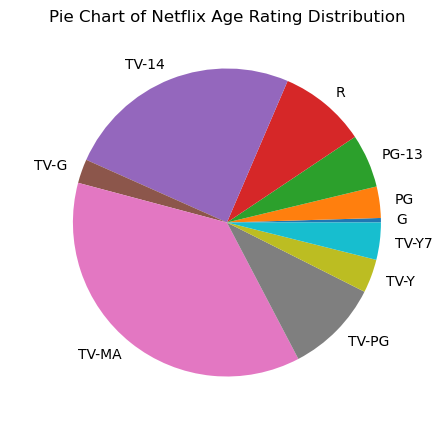

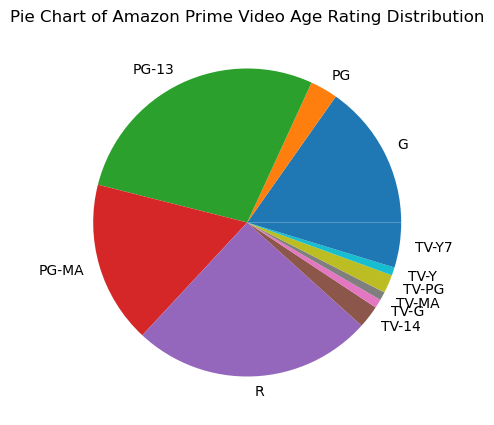

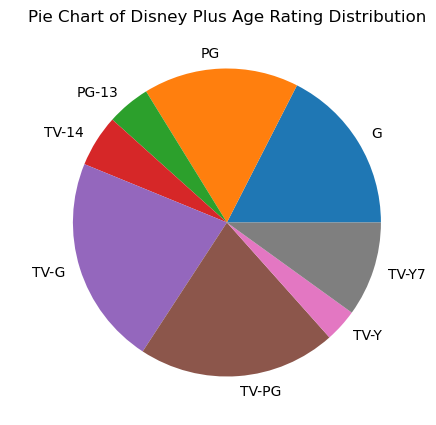

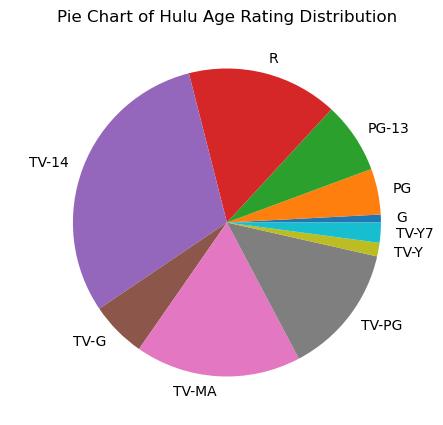

In [ ]:
YR_plot_NF=yearRating_NF.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Netflix Age Rating Distribution')
YR_plot_NF.get_legend().remove()
YR_plot_NF.set_ylabel(" ")

YR_plot_AP=yearRating_AP.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Amazon Prime Video Age Rating Distribution')
YR_plot_AP.get_legend().remove()
YR_plot_AP.set_ylabel(" ")

YR_plot_DP=yearRating_DP.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Disney Plus Age Rating Distribution')
YR_plot_DP.get_legend().remove()
YR_plot_DP.set_ylabel(" ")

YR_plot_HU=yearRating_HU.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Hulu Age Rating Distribution')
YR_plot_HU.get_legend().remove()
YR_plot_HU.set_ylabel(" ")

Text(0, 0.5, ' ')

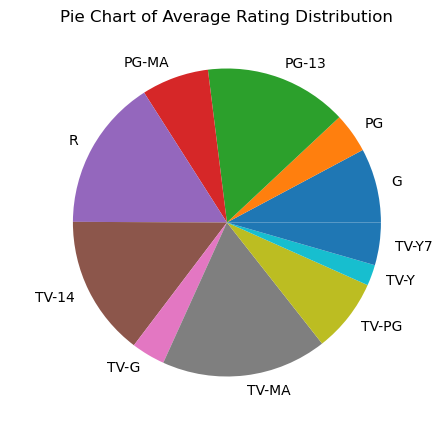

In [ ]:
df = [NF2,DP2,AP2,HU2]
merge=pd.concat(df)

merge=merge.groupby(['rating']).count()

YR_plot_merge=merge.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Average Rating Distribution')
YR_plot_merge.get_legend().remove()
YR_plot_merge.set_ylabel(" ")

[Text(0.5, 23.52222222222222, 'Rating'), Text(50.722222222222214, 0.5, 'Year')]

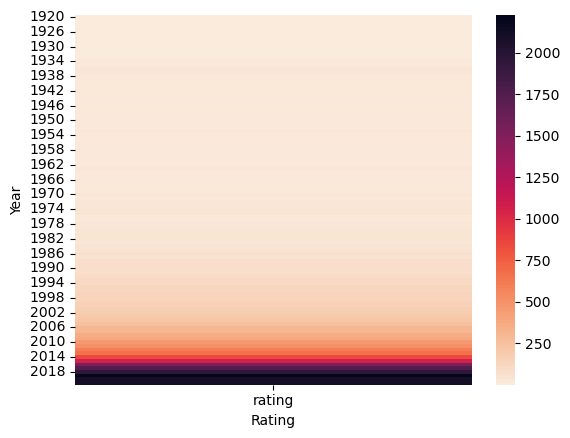

In [ ]:
df1 = [NF2,DP2,AP2,HU2]

year=pd.concat(df1)

year=year.groupby(['release_year']).count()
year_plot=sns.heatmap(year,fmt=".3f",cmap="rocket_r")
year_plot.set(xlabel='Rating', ylabel='Year')


<seaborn.axisgrid.FacetGrid>

<Figure size 300x600 with 0 Axes>

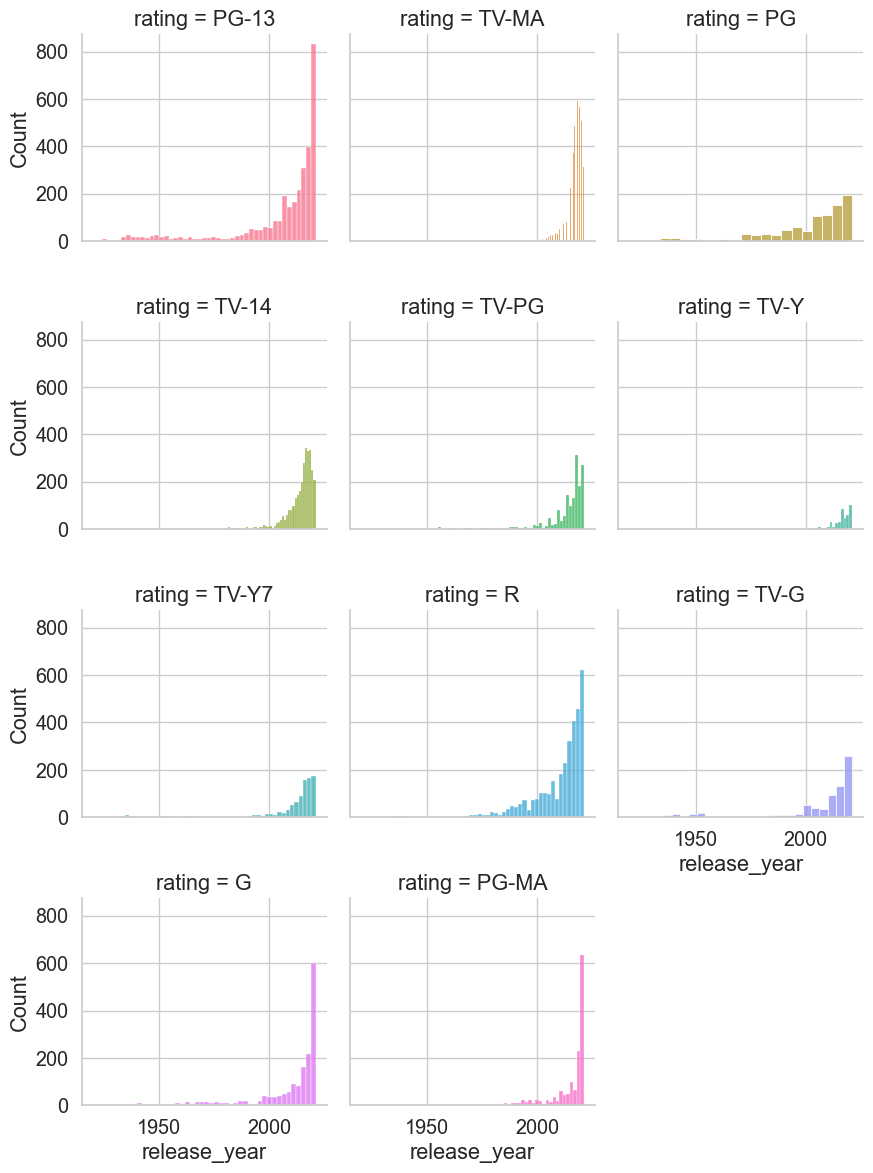

In [ ]:

df1 = [NF2,DP2,AP2,HU2]

year=pd.concat(df1)

plt.figure(figsize=(3,6))
sns.set_theme(style="whitegrid",font_scale=1.3)


plot = sns.FacetGrid(year, col="rating", hue="rating", col_wrap=3)
plot.map(sns.histplot,"release_year")

In [ ]:
# % of movies from before or after century

NF_perc=NF.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
before=0
after=0
for i in range(NF_perc['rating'].count()):
    if NF_perc.release_year[i]<2000:
        before=before+1
    else: 
        after = after+1
    
NF_perc=NF_perc.groupby(['release_year']).count()
print(after)
print(before)

8278
525
